In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import seaborn as sns
import plotly

# Importing Data

In [2]:
data = pd.read_csv("State_Level_CPI.csv")
data.head()

,Sector,Year,Name,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chattisgarh,Delhi,Goa,...,Uttar Pradesh,Uttarakhand,West Bengal,Andaman and Nicobar,Chandigarh,Dadra and Nagar Haveli,Daman and Diu,Jammu and Kashmir,Lakshadweep,Puducherry
0,Rural,2011,January,104.0,NaN,104.0,NaN,105.0,NaN,103.0,...,103.0,NaN,104.0,105.0,104.0,104.0,103.0,104.0,103.0,106.0
1,Urban,2011,January,103.0,NaN,103.0,NaN,104.0,NaN,103.0,...,103.0,NaN,104.0,105.0,103.0,104.0,103.0,104.0,102.0,105.0
2,Rural+Urban,2011,January,103.0,NaN,104.0,NaN,104.0,NaN,103.0,...,103.0,NaN,104.0,106.0,103.0,104.0,104.0,104.0,104.0,104.0
3,Rural,2011,February,107.0,NaN,105.0,NaN,107.0,NaN,105.0,...,104.0,NaN,107.0,105.0,104.0,107.0,104.0,105.0,104.0,107.0
4,Urban,2011,February,106.0,NaN,106.0,NaN,106.0,NaN,105.0,...,105.0,NaN,108.0,104.0,103.0,106.0,104.0,105.0,105.0,108.0


In [3]:
# Check data's shape
print(data.shape)

(470, 39)


In [4]:
# Check how many columns have around 1/4th of the data missing:
for col in data.columns:
    missing = data[col].isnull().sum()
    if missing > 100:
        print(f"{col} has {missing} missing values")

Arunachal Pradesh has 390 missing values
Bihar has 354 missing values
Delhi has 354 missing values
Nagaland has 354 missing values
Rajasthan has 354 missing values
Sikkim has 354 missing values
Telangana has 156 missing values
Uttarakhand has 354 missing values


#### Since, we can see these States/UTs have much more data missing, we should drop or not consider them.

In [5]:
# Drop the columns with more than 100 missing values
data1 = data.drop(['Arunachal Pradesh', 'Bihar', 'Delhi', 'Nagaland', 'Rajasthan', 'Sikkim', 'Telangana', 'Uttarakhand'], axis=1)
print(data1.shape)

(470, 31)


In [6]:
for col in data1.columns:
    missing = data1[col].isnull().sum()
    if missing > 0:
        print(f"{col} has {missing} missing values")

Andhra Pradesh has 10 missing values
Assam has 9 missing values
Chattisgarh has 9 missing values
Goa has 9 missing values
Gujarat has 9 missing values
Haryana has 9 missing values
Himachal Pradesh has 15 missing values
Jharkhand has 9 missing values
Karnataka has 9 missing values
Kerala has 9 missing values
Madhya Pradesh has 9 missing values
Maharashtra has 9 missing values
Manipur has 9 missing values
Meghalaya has 9 missing values
Mizoram has 9 missing values
Orissa has 9 missing values
Punjab has 9 missing values
Tamil Nadu has 9 missing values
Tripura has 15 missing values
Uttar Pradesh has 9 missing values
West Bengal has 15 missing values
Andaman and Nicobar has 9 missing values
Chandigarh has 9 missing values
Dadra and Nagar Haveli has 9 missing values
Daman and Diu has 9 missing values
Jammu and Kashmir has 9 missing values
Lakshadweep has 9 missing values
Puducherry has 9 missing values


In [7]:
# Now filling these values:
numeric_cols = data1.select_dtypes(include=[np.number]).columns

data1[numeric_cols] = data1[numeric_cols].fillna(method='ffill')
data1[numeric_cols] = data1[numeric_cols].interpolate(method='linear')
data1[numeric_cols] = data1[numeric_cols].fillna(data1.groupby('Year')[numeric_cols].transform('mean'))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30004\630154727.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1[numeric_cols] = data1[numeric_cols].fillna(method='ffill')


In [8]:
# Create a dictionary to map states to regions
state_region = {
    'Jammu and Kashmir': 'Northern Region',
    'Himachal Pradesh': 'Northern Region',
    'Punjab': 'Northern Region',
    'Chandigarh': 'Northern Region',
    'Haryana': 'Northern Region',
    'Gujarat': 'Western Region',
    'Maharashtra': 'Western Region',
    'Goa': 'Western Region',
    'Daman and Diu': 'Western Region',
    'Dadra and Nagar Haveli': 'Western Region',
    'Andhra Pradesh': 'Southern Region',
    'Karnataka': 'Southern Region',
    'Kerala': 'Southern Region',
    'Tamil Nadu': 'Southern Region',
    'Puducherry': 'Southern Region',
    'Lakshadweep': 'Southern Region',
    'West Bengal': 'Eastern Region',
    'Jharkhand': 'Eastern Region',
    'Orissa': 'Eastern Region',
    'Uttar Pradesh': 'Central Region',
    'Chattisgarh': 'Central Region',
    'Madhya Pradesh': 'Central Region',
    'Assam': 'North-Eastern Region',
    'Meghalaya': 'North-Eastern Region',
    'Manipur': 'North-Eastern Region',
    'Mizoram': 'North-Eastern Region',
    'Tripura': 'North-Eastern Region',
    'Andaman and Nicobar': 'Islands'
}

In [9]:
# Plot for northern regions:
northern_states = ['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh', 'Haryana']
southern_states = ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Puducherry', 'Lakshadweep']
western_states = ['Gujarat', 'Maharashtra', 'Goa', 'Daman and Diu', 'Dadra and Nagar Haveli']
eastern_states = ['West Bengal', 'Jharkhand', 'Orissa']
central_states = ['Uttar Pradesh', 'Chattisgarh', 'Madhya Pradesh']
northeastern_states = ['Assam', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura']
island_states = ['Andaman and Nicobar']

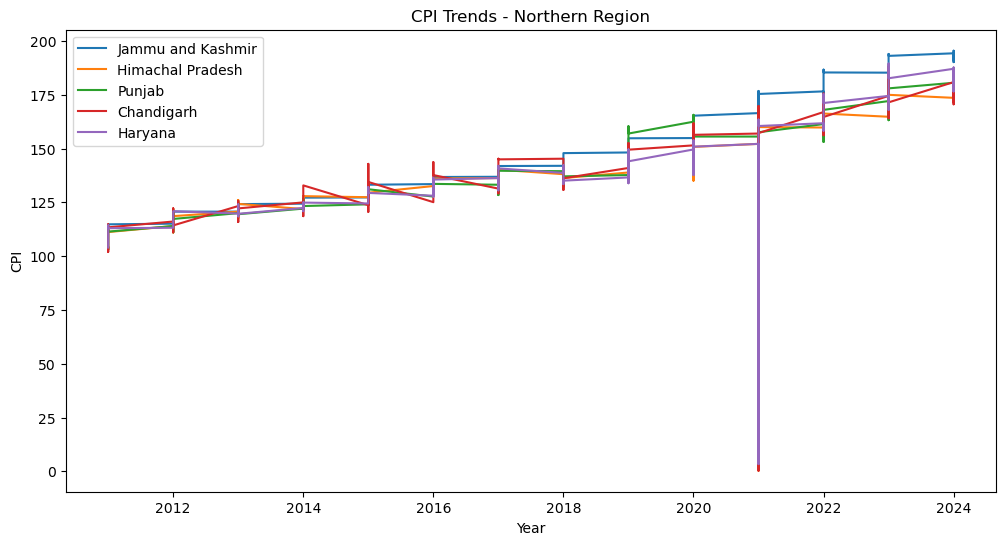

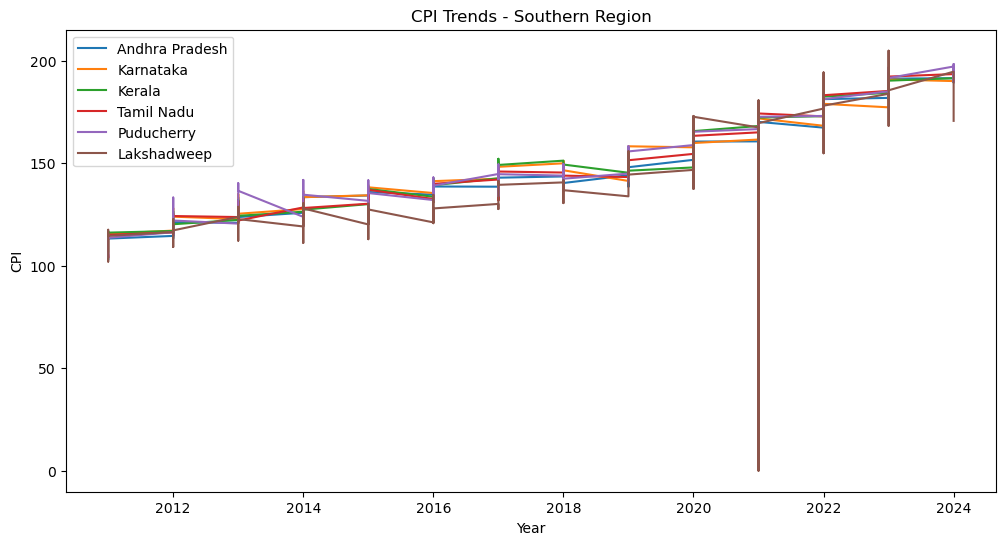

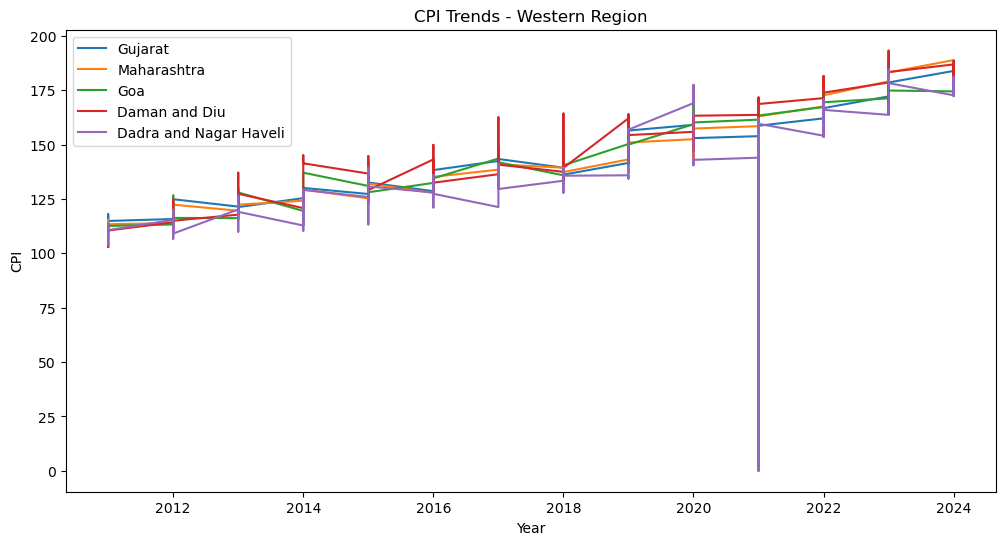

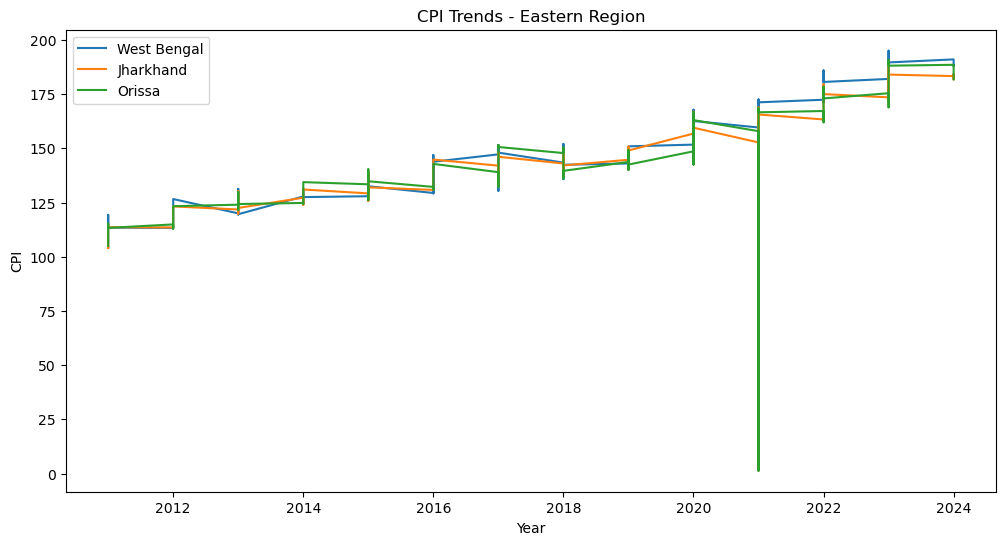

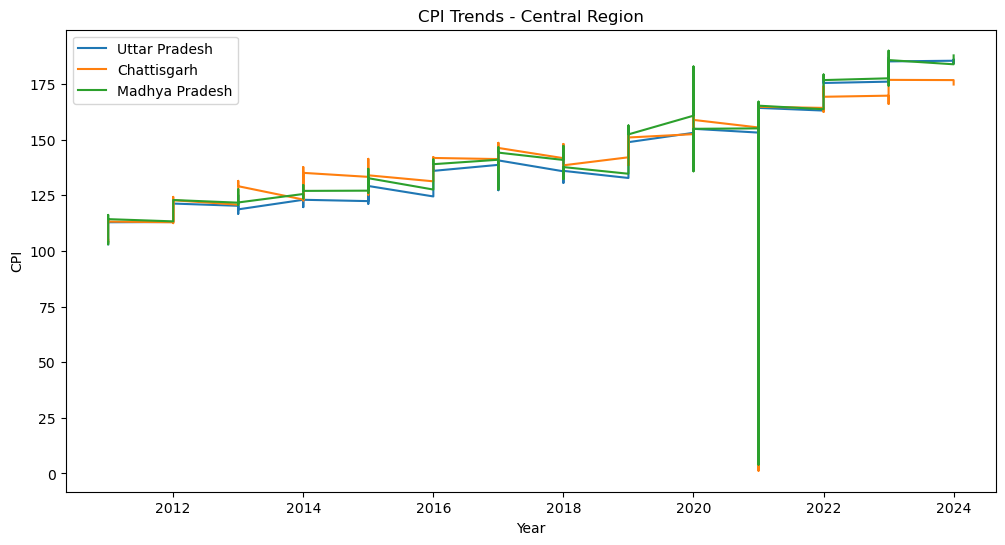

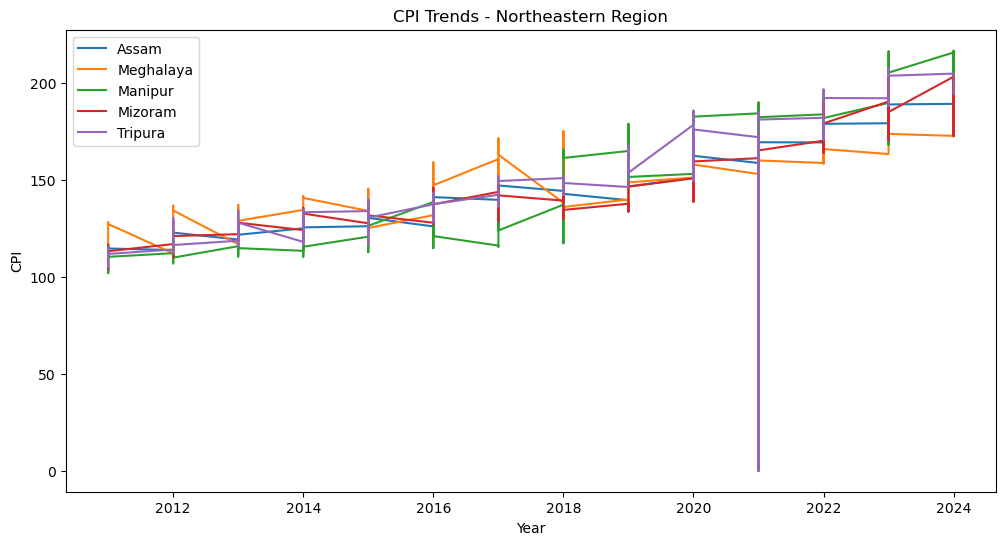

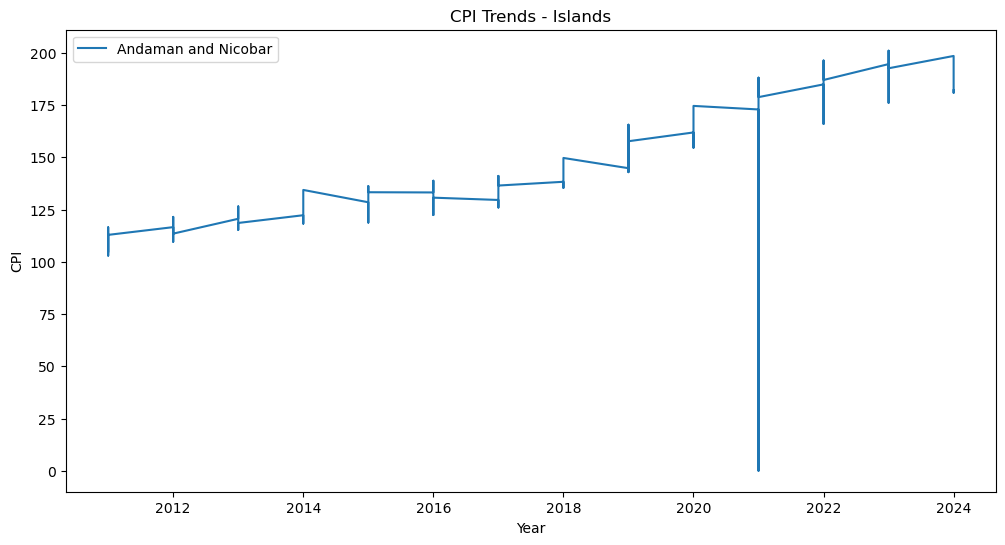

In [15]:
def plot_cpi_trends(df, state_columns, title):
    plt.figure(figsize=(12, 6))
    
    for state in state_columns:
        if state in df.columns:  # Ensure the column exists
            df[state] = pd.to_numeric(df[state], errors='coerce')  # Convert to numeric
            plt.plot(df["Year"], df[state], label=state)

    plt.xlabel("Year")
    plt.ylabel("CPI")
    plt.title(f"CPI Trends - {title}")
    plt.legend()
    plt.show()

# Plot for each region
plot_cpi_trends(data1, northern_states, "Northern Region")
plot_cpi_trends(data1, southern_states, "Southern Region")
plot_cpi_trends(data1, western_states, "Western Region")
plot_cpi_trends(data1, eastern_states, "Eastern Region")
plot_cpi_trends(data1, central_states, "Central Region")
plot_cpi_trends(data1, northeastern_states, "Northeastern Region")
plot_cpi_trends(data1, island_states, "Islands")

In [16]:
# Splitting data based on Sectors:
df_rural = data1[data1['Sector'] == 'Rural'].drop('Sector', axis=1)
df_urban = data1[data1['Sector'] == 'Urban'].drop('Sector', axis=1)
df_rural_urban = data1[data1['Sector'] == 'Rural+Urban'].drop('Sector', axis=1)

In [17]:
df_rural = df_rural.apply(pd.to_numeric, errors='coerce')
df_urban = df_urban.apply(pd.to_numeric, errors='coerce')
df_rural_urban = df_rural_urban.apply(pd.to_numeric, errors='coerce')

In [18]:
df_rural["Year"] = pd.to_datetime(df_rural["Year"], format='%Y')
df_urban["Year"] = pd.to_datetime(df_urban["Year"], format='%Y')
df_rural_urban["Year"] = pd.to_datetime(df_rural_urban["Year"], format='%Y')

In [19]:
cpi_rural = df_rural.drop(columns=['Year']).values.flatten()
cpi_urban = df_urban.drop(columns=['Year']).values.flatten()
cpi_rural_urban = df_rural_urban.drop(columns=['Year']).values.flatten()

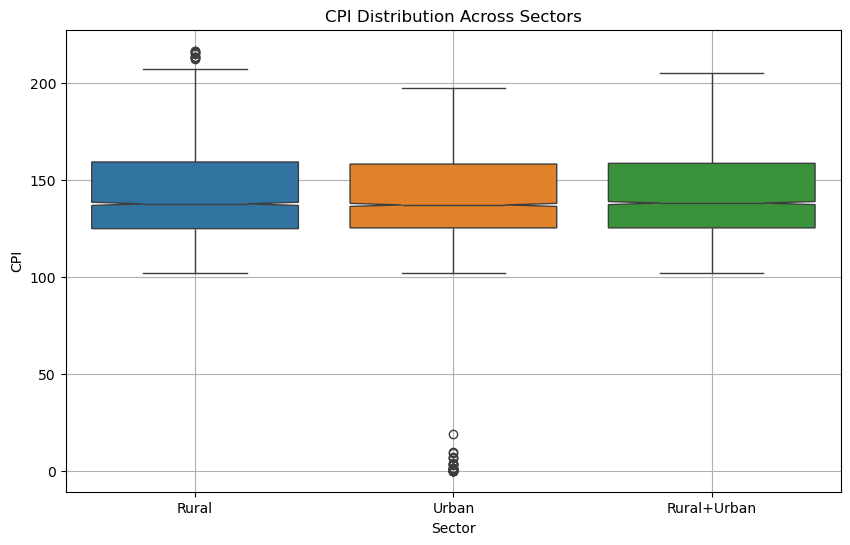

In [20]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[cpi_rural, cpi_urban, cpi_rural_urban], notch=True)

# Set labels
plt.xticks(ticks=[0, 1, 2], labels=['Rural', 'Urban', 'Rural+Urban'])
plt.xlabel("Sector")
plt.ylabel("CPI")
plt.title("CPI Distribution Across Sectors")
plt.grid(True)
plt.show()

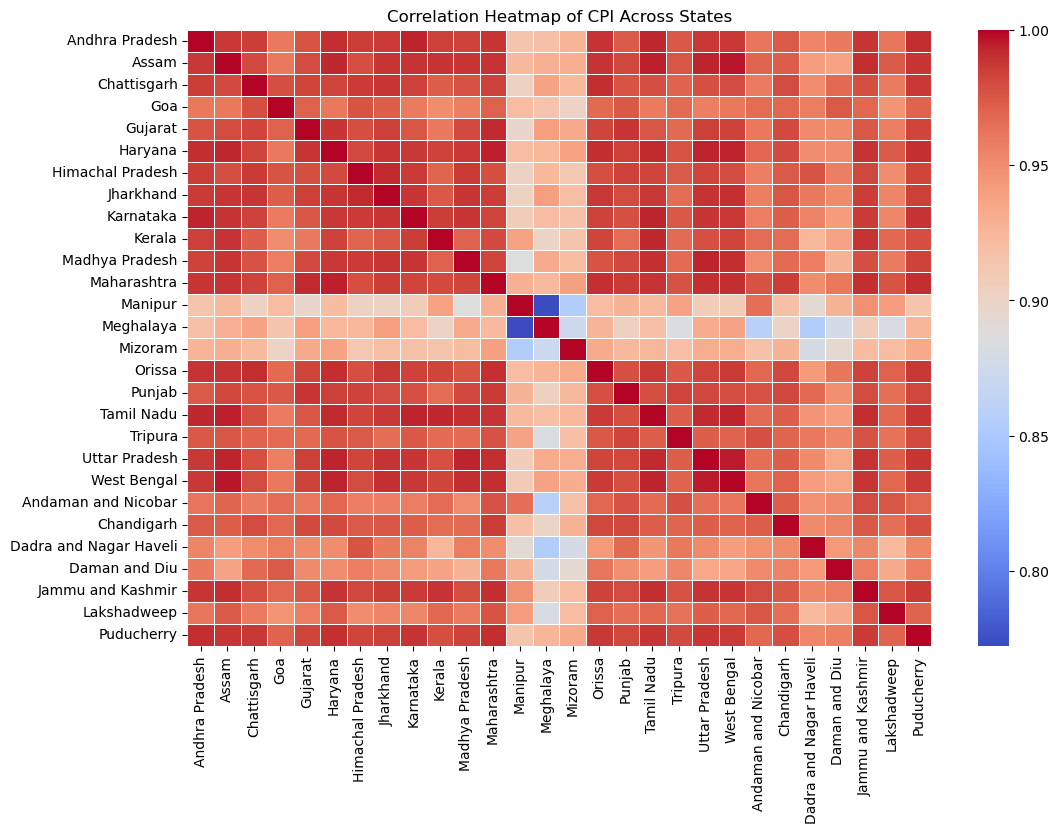

In [22]:
# Drop non-state columns
df_corr = data1.drop(columns=['Year', 'Sector', 'Name'], errors='ignore')

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of CPI Across States")
plt.show()

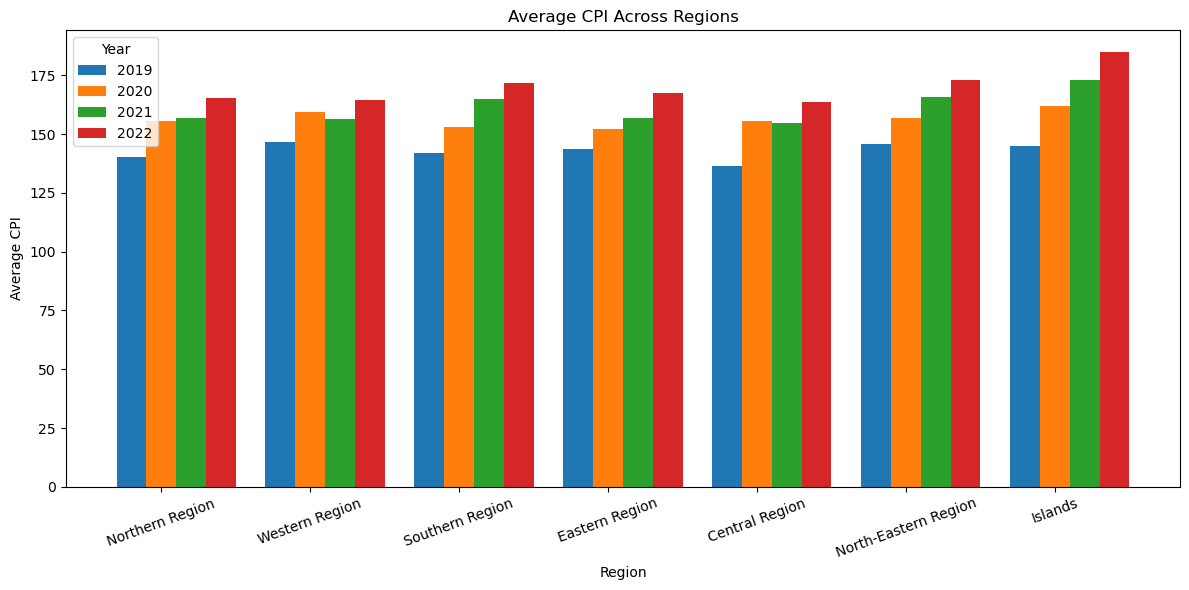

In [40]:
regions = {
    'Northern Region': ['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh', 'Haryana'],
    'Western Region': ['Gujarat', 'Maharashtra', 'Goa', 'Daman and Diu', 'Dadra and Nagar Haveli'],
    'Southern Region': ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Puducherry', 'Lakshadweep'],
    'Eastern Region': ['West Bengal', 'Jharkhand', 'Orissa'],
    'Central Region': ['Uttar Pradesh', 'Chattisgarh', 'Madhya Pradesh'],
    'North-Eastern Region': ['Assam', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura'],
    'Islands': ['Andaman and Nicobar']
}

year_of_interests = [2019, 2020, 2021, 2022]

def plot_cpi_regions(df, regions, years):
    region_cpi = {year: {} for year in years}

    for year in years:
        df_year = df[df["Year"] == year]  # Filter for each year
        
        for region, states in regions.items():
            valid_states = [state for state in states if state in df_year.columns]  # Check if states exist
            if valid_states:
                region_cpi[year][region] = df_year[valid_states].mean(axis=1).values[0]  # Extract single value

    # Plot grouped bar chart
    bar_width = 0.2  # Width of bars
    colors = list(mcolors.TABLEAU_COLORS.values())
    x_labels = list(regions.keys())
    x_indices = np.arange(len(x_labels))

    plt.figure(figsize=(12, 6))

    for i, year in enumerate(years):
        cpi_values = [region_cpi[year].get(region, 0) for region in x_labels]  # Ensure single values
        plt.bar(x_indices + i * bar_width, cpi_values, width=bar_width, color=colors[i % len(colors)], label=str(year))

    plt.xlabel("Region")
    plt.ylabel("Average CPI")
    plt.title("Average CPI Across Regions")
    plt.xticks(x_indices + bar_width, x_labels, rotation=20)
    plt.legend(title="Year")
    plt.tight_layout()
    plt.show()

plot_cpi_regions(data1, regions, year_of_interests)

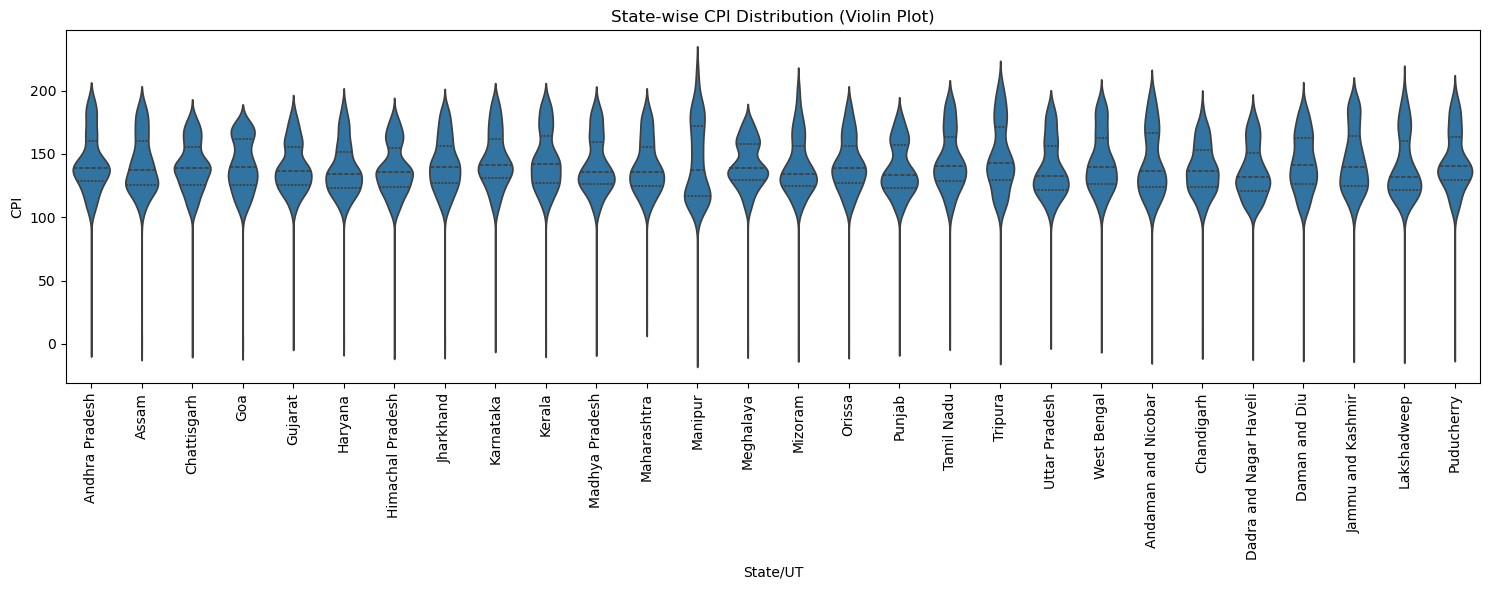

In [39]:
def plot_statewise_violin(df):
    plt.figure(figsize=(15, 6))
    df_melted = df.melt(id_vars=["Year", "Sector", "Name"], var_name="State", value_name="CPI")

    sns.violinplot(x="State", y="CPI", data=df_melted, inner="quartile")
    plt.xticks(rotation=90)
    plt.xlabel("State/UT")
    plt.ylabel("CPI")
    plt.title("State-wise CPI Distribution (Violin Plot)")
    plt.tight_layout()
    plt.show()

plot_statewise_violin(data1)